<a href="https://colab.research.google.com/github/lokeshippili/codsoft_taskno/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:


data = pd.read_csv('/content/sms ml h.csv')

In [ ]:
data.head()

,time,V1,V2,V3,Amount,Class
0,0,-1.359807,-0.348746,2.536347,0.955,0
1,0,1.234354,0.734476,0.166048,2.076,0
2,1,-1.343425,-1.378436,1.873868,-0.855,0
3,1,-0.934636,-0.173464,1.426864,0.267,0
4,2,-1.347539,0.875868,1.466344,1.087,0


In [ ]:

pd.options.display.max_columns = 100

In [ ]:
data.head()

,time,V1,V2,V3,Amount,Class
0,0,-1.359807,-0.348746,2.536347,0.955,0
1,0,1.234354,0.734476,0.166048,2.076,0
2,1,-1.343425,-1.378436,1.873868,-0.855,0
3,1,-0.934636,-0.173464,1.426864,0.267,0
4,2,-1.347539,0.875868,1.466344,1.087,0


In [ ]:
data.shape

(5, 6)

In [ ]:
print("Number of columns: {}". format(data.shape[1]))
print("Number of rows: {}". format(data.shape[0]))

Number of columns: 6
Number of rows: 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5 non-null      int64  
 1   V1      5 non-null      float64
 2   V2      5 non-null      float64
 3   V3      5 non-null      float64
 4   Amount  5 non-null      float64
 5   Class   5 non-null      int64  
dtypes: float64(4), int64(2)
memory usage: 368.0 bytes


In [ ]:
data.isnull().sum()

,0
time,0
V1,0
V2,0
V3,0
Amount,0
Class,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:

data.head()

,time,V1,V2,V3,Amount,Class
0,0,-1.359807,-0.348746,2.536347,0.256456,0
1,0,1.234354,0.734476,0.166048,1.411021,0
2,1,-1.343425,-1.378436,1.873868,-1.607741,0
3,1,-0.934636,-0.173464,1.426864,-0.452145,0
4,2,-1.347539,0.875868,1.466344,0.392408,0


In [ ]:
data = data.drop(['time'], axis =1)

In [ ]:
data.head()

,V1,V2,V3,Amount,Class
0,-1.359807,-0.348746,2.536347,0.256456,0
1,1.234354,0.734476,0.166048,1.411021,0
2,-1.343425,-1.378436,1.873868,-1.607741,0
3,-0.934636,-0.173464,1.426864,-0.452145,0
4,-1.347539,0.875868,1.466344,0.392408,0


In [ ]:
data.duplicated().any()

False

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(5, 5)

In [ ]:
data['Class'].value_counts()

,count
Class,
0,5


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

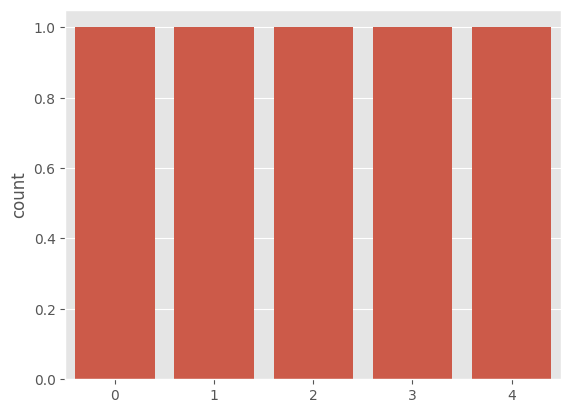

In [ ]:
sns.countplot(data['Class'])
plt.show()

In [ ]:
x = data.drop(['Class'], axis =1)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Stochastic Gradient Descent Classifier": SGDClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC()),
        ('knn', KNeighborsClassifier())
    ], voting='hard')
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")
    print(f" F1 Score: {f1}")


    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))


==========Logistic Regression===========


NameError: name 'X_train' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

nan_indices_X_train = np.any(np.isnan(X_train), axis=1)
nan_indices_y_train = np.isnan(y_train)

X_train_clean = X_train[~nan_indices_X_train]
y_train_clean = y_train[~nan_indices_y_train]
imputer = SimpleImputer(strategy='mean')


classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Stochastic Gradient Descent Classifier": SGDClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC()),
        ('knn', KNeighborsClassifier())
    ], voting='hard')
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")


    pipeline = Pipeline([
        ('imputer', imputer),
        ('classifier', clf)
    ])

    pipeline.fit(X_train_clean, y_train_clean)


    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")
    print(f" F1 Score: {f1}")
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

NameError: name 'X' is not defined

In [ ]:
# Undersampling

In [ ]:
normal = data[data['Class'] ==0]
fraud = data[data['Class'] == 1]

In [ ]:
normal.shape

(5, 5)

In [ ]:

fraud.shape

(0, 5)

In [ ]:
normalize_sample = normal.sample(n = 5)

In [ ]:
normalize_sample.shape

(5, 5)

In [ ]:
new_data = pd.concat([normalize_sample, fraud], ignore_index = True)

In [ ]:
new_data.head()

,V1,V2,V3,Amount,Class
0,-0.934636,-0.173464,1.426864,-0.452145,0
1,-1.343425,-1.378436,1.873868,-1.607741,0
2,-1.347539,0.875868,1.466344,0.392408,0
3,1.234354,0.734476,0.166048,1.411021,0
4,-1.359807,-0.348746,2.536347,0.256456,0


In [ ]:
new_data['Class'].value_counts()

,count
Class,
0,5


In [ ]:
X = new_data.drop(['Class'], axis =1)
y = new_data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5,stratify=y)

In [ ]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
# Check the unique values and their counts in the target variable 'y'
print(y.value_counts())

# If there is only one class, consider the following:

# 1. Check if the data loading or preprocessing steps have introduced errors
#    that resulted in only one class being present in the target variable.
#    If so, correct these errors to ensure that both classes are included.

# 2. If the data inherently has only one class, Logistic Regression is not
#    suitable for this task. Consider using a different algorithm or
#    reframing the problem as an anomaly detection task.

# Example: If the data is imbalanced but has both classes, you can try
# using techniques like oversampling or undersampling to balance the classes
# before training the model.
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=5)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# 3. If you still want to use Logistic Regression, you might need to modify
#    the solver or consider creating a synthetic dataset with both classes.

# After addressing the issue with the target variable, rerun the training code.

Class
0    5
Name: count, dtype: int64


In [ ]:
#OVERSAMPLING

In [ ]:
x = data.drop(['Class'], axis =1)
y = data['Class']

In [ ]:
x.shape

(5, 4)

In [ ]:
y.shape

(5,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, y_train = SMOTE().fit_resample(X, y)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Assuming you have your feature matrix X and target vector y defined
# Handle NaN values in y
nan_indices_y = np.isnan(y)
X_clean = X[~nan_indices_y]
y_clean = y[~nan_indices_y]

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_clean)

# Use SMOTE to handle class imbalance and missing values
X_res, y_res = SMOTE().fit_resample(X_imputed, y_clean)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [ ]:
model = joblib.load("credit_card_model.pkl")

In [ ]:
pred = model.predict([[-1.35981,-0.34875,2.536347,0.955]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pred[0]

0

In [ ]:
if pred[0] == 0:
  print("Normal Transaction")
else:
  print("Fraud Transacation")

Normal Transaction
